# Coursera Capstone Project

### This notebook will be mainly used for the capstone project

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import datetime
from sklearn import preprocessing

In [4]:
#Folium
!conda install -c conda-forge folium=0.5.0 --yes
print("folium installed!")

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    chardet-3.0.4              |py36h9880bd3_1008         194 KB  conda-forge
    cryptography-3.2.1         |   py36h6ec43e4_0         633 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.1.4               |   py36hd87012b_0        10.5 MB  conda-forge
    pysocks-1.7.1              |   py36h9880bd3_2          27 KB  conda-

In [5]:
from sklearn import metrics

# Data Import

In [6]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  \
0  Matched  Intersection  37475.0   
1  Matched         Block      NaN   
2  Matched         Block      NaN   
3  Matched         Block      NaN   
4  Matched  Intersection  34387.0   

                                      LOCATION EXCEPTRSNCODE EXCEPTRSNDESC  \
0                   5TH AVE NE AND NE 103RD ST                         NaN   
1   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N           NaN           NaN   
2  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST           NaN           NaN   
3     2ND AVE BETWEEN MARION ST AND MADISON ST                         NaN   
4              SWIFT AVE S AND SWIFT AV OFF RP           NaN           NaN   

   SEVERITYCODE.1                    SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  \
0               2                Injury Collision        Angles            2   
1               1  Property Damage Only Collision     Sideswipe            2   
2               1  Property Damage Only Collision    Parked Car            4   
3               1  Property Damage Only Collision         Other            3   
4               2                Injury Collision        Angles            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT                 INCDATE  \
0         0            0         2  2013/03/27 00:00:00+00   
1         0            0         2  2006/12/20 00:00:00+00   
2         0            0         3  2004/11/18 00:00:00+00   
3         0            0         3  2013/03/29 00:00:00+00   
4         0            0         2  2004/01/28 00:00:00+00   

                  INCDTTM                             JUNCTIONTYPE  \
0    3/27/2013 2:54:00 PM   At Intersection (intersection related)   
1   12/20/2006 6:55:00 PM  Mid-Block (not related to intersection)   
2  11/18/2004 10:20:00 AM  Mid-Block (not related to intersection)   
3    3/29/2013 9:26:00 AM  Mid-Block (not related to intersection)   
4    1/28/2004 8:04:00 AM   At Intersection (intersection related)   

   SDOT_COLCODE                                       SDOT_COLDESC  \
0            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
1            16  MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...   
2            14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
3            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
4            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N  Overcast      Wet                 Daylight   
1            NaN         0   Raining      Wet  Dark - Street Lights On   
2            NaN         0  Overcast      Dry                 Daylight   
3            NaN         N     Clear      Dry                 Daylight   
4            NaN         0   Raining      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Enterin

In [7]:
df.shape

(194673, 38)

In [8]:
df.describe()

SEVERITYCODE              X              Y       OBJECTID  \
count  194673.000000  189339.000000  189339.000000  194673.000000   
mean        1.298901    -122.330518      47.619543  108479.364930   
std         0.457778       0.029976       0.056157   62649.722558   
min         1.000000    -122.419091      47.495573       1.000000   
25%         1.000000    -122.348673      47.575956   54267.000000   
50%         1.000000    -122.330224      47.615369  106912.000000   
75%         2.000000    -122.311937      47.663664  162272.000000   
max         2.000000    -122.238949      47.734142  219547.000000   

              INCKEY      COLDETKEY         INTKEY  SEVERITYCODE.1  \
count  194673.000000  194673.000000   65070.000000   194673.000000   
mean   141091.456350  141298.811381   37558.450576        1.298901   
std     86634.402737   86986.542110   51745.990273        0.457778   
min      1001.000000    1001.000000   23807.000000        1.000000   
25%     70383.000000   70383.000000   28667.000000        1.000000   
50%    123363.000000  123363.000000   29973.000000        1.000000   
75%    203319.000000  203459.000000   33973.000000        2.000000   
max    331454.000000  332954.000000  757580.000000        2.000000   

         PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT       VEHCOUNT  \
count  194673.000000  194673.000000  194673.000000  194673.000000   
mean        2.444427       0.037139       0.028391       1.920780   
std         1.345929       0.198150       0.167413       0.631047   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       2.000000   
50%         2.000000       0.000000       0.000000       2.000000   
75%         3.000000       0.000000       0.000000       2.000000   
max        81.000000       6.000000       2.000000      12.000000   

        SDOT_COLCODE    SDOTCOLNUM     SEGLANEKEY  CROSSWALKKEY  
count  194673.000000  1.149360e+05  194673.000000  1.946730e+05  
mean       13.867768  7.972521e+06     269.401114  9.782452e+03  
std         6.868755  2.553533e+06    3315.776055  7.226926e+04  
min         0.000000  1.007024e+06       0.000000  0.000000e+00  
25%        11.000000  6.040015e+06       0.000000  0.000000e+00  
50%        13.000000  8.023022e+06       0.000000  0.000000e+00  
75%        14.000000  1.015501e+07       0.000000  0.000000e+00  
max        69.000000  1.307202e+07  525241.000000  5.239700e+06

In [9]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

# Data Cleaning

## Droping features that cannot be used to help the bussiness problem ( Emergency Medical Services Alert System)

#### OBJECTID, INCKEY, COLDETKEY, REPORTNO and SDOTCOLNUM are for internal use of the city of seattle and are unique identifiers that covey no information

In [10]:
df_c = df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO', 'SDOTCOLNUM'],axis=1)

In [11]:
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

####  EXCEPTRSNCODE, EXCEPTRSNDESC have no metadata to describe the features and STATUS is similarly undocumented

In [12]:
df_c = df_c.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'STATUS'],axis=1)
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

####  SEVERITYCODE.1 and SEVERITYDESC are duplicates of the target variable as convey the same information

In [13]:
df_c = df_c.drop(['SEVERITYCODE.1', 'SEVERITYDESC'],axis=1)
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

####  PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT while may be useful for analysis post incident are descriptive in nature and cannot be used for prediction as one cannot in advance know many people, pedestrians, bicycles or vehicles will be involved in an accident

In [14]:
df_c = df_c.drop(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'],axis=1)
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

####  COLLISIONTYPE, JUNCTIONTYPE, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, SPEEDING, SEGLANEKEY, HITPARKEDCAR have the same limitations as the features above since one cannot know if people will be inattentive, under the influence, if they grant a pedestrian rigth of way, are speeding, on which lane they are, the type of junction or collision when accident happens or if they hit a parked car until after the accident

In [15]:
df_c = df_c.drop(['COLLISIONTYPE','JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'SEGLANEKEY', 'HITPARKEDCAR'],axis=1)
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'INCDATE',
       'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'CROSSWALKKEY'],
      dtype='object')

####  SDOT_COLCODE, SDOT_COLDESC, ST_COLCODE and ST_COLDESC and  are also descriptive features that while possesing a plenty of useful data cannot be used as a basis for an alert of the Emergency Medical Services

In [16]:
df_c = df_c.drop(['SDOT_COLCODE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC'],axis=1)
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'INCDATE',
       'INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'CROSSWALKKEY'],
      dtype='object')

#### The resulting dataset is limited now several types of Features:
##### Location Features: X, Y, ADDRTYPE, INTKEY, CROSSWALKKEY
##### Date and Time Features: INCDATE, INCDTTM
##### Condition Features: WEATHER, ROADCOND, LIGHTCOND
##### Of these only the Date, Time and Condition Features can be used as an alert system and they are not in a numerical form so it will be necessary to convert them. 
##### However, knowing if certain locations are more prone to accidents resulting in injuries can be of use to the emergency service so lets do some quick exploratory analysis to see if it is worth pursuing:

In [17]:
df_c.head()

SEVERITYCODE           X          Y      ADDRTYPE   INTKEY  \
0             2 -122.323148  47.703140  Intersection  37475.0   
1             1 -122.347294  47.647172         Block      NaN   
2             1 -122.334540  47.607871         Block      NaN   
3             1 -122.334803  47.604803         Block      NaN   
4             2 -122.306426  47.545739  Intersection  34387.0   

                                      LOCATION                 INCDATE  \
0                   5TH AVE NE AND NE 103RD ST  2013/03/27 00:00:00+00   
1   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N  2006/12/20 00:00:00+00   
2  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST  2004/11/18 00:00:00+00   
3     2ND AVE BETWEEN MARION ST AND MADISON ST  2013/03/29 00:00:00+00   
4              SWIFT AVE S AND SWIFT AV OFF RP  2004/01/28 00:00:00+00   

                  INCDTTM   WEATHER ROADCOND                LIGHTCOND  \
0    3/27/2013 2:54:00 PM  Overcast      Wet                 Daylight   
1   12/20/2006 6:55:00 PM   Raining      Wet  Dark - Street Lights On   
2  11/18/2004 10:20:00 AM  Overcast      Dry                 Daylight   
3    3/29/2013 9:26:00 AM     Clear      Dry                 Daylight   
4    1/28/2004 8:04:00 AM   Raining      Wet                 Daylight   

   CROSSWALKKEY  
0             0  
1             0  
2             0  
3             0  
4             0

In [18]:
df_c.corr()

SEVERITYCODE         X         Y    INTKEY  CROSSWALKKEY
SEVERITYCODE      1.000000  0.010309  0.017737  0.006553      0.175093
X                 0.010309  1.000000 -0.160262  0.120754      0.013586
Y                 0.017737 -0.160262  1.000000 -0.114935      0.009508
INTKEY            0.006553  0.120754 -0.114935  1.000000      0.018420
CROSSWALKKEY      0.175093  0.013586  0.009508  0.018420      1.000000

In [19]:
df_c['CROSSWALKKEY'].value_counts()

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [20]:
df_c['X'].value_counts()

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64

In [21]:
df_c['Y'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64

In [22]:
df_c['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
S AUSTIN ST BETWEEN DEAD END AND 35TH AVE S                         1
NE 57TH ST BETWEEN 8TH AVE NE AND ROOSEVELT WAY NE                  1
34TH AVE S BETWEEN CLAREMONT PL S AND S DAKOTA ST                   1
34TH AVE BETWEEN E OLIVE ST AND E HOWELL ST                         1
6TH AVE S BETWEEN S BRADFORD ST AND S ANDOVER ST                    1
Name: LOCATION, Length: 24102, dtype: int64

#### From this quick exploratory analysis there appears to be data that while not useful for an alert system may be of use to the EMS. Knowing if certain locations are more prone to accidents with injuries which the CROSSWALKKEY feature correlation (even if small) sugests and that certain locations have much more accidents in total and thus a higher number of accidents with injuries even if they evenly mixed with property damage accidents could help with locating fast response units ( where to park an ambulance on duty) or plan future infrastructure( hospitals, clinics).
#### However the location data is often duplicated in this dataset and 'noisy' as is the case for the LOCATION feature or only applicable in a subset of cases such as INTKEY and CROSSWALKKEY features or even descriptive in nature - ADDRTYPE feature. So lets drop them as well and focus the analysis on the essential. The X and Y Features will be kept for possible ploting on a map or cluster based analysis.

In [23]:
df_c = df_c.drop(['ADDRTYPE', 'INTKEY', 'CROSSWALKKEY', 'LOCATION'],axis=1)
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'INCDATE', 'INCDTTM', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

In [24]:
df_c.head()

SEVERITYCODE           X          Y                 INCDATE  \
0             2 -122.323148  47.703140  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  2004/01/28 00:00:00+00   

                  INCDTTM   WEATHER ROADCOND                LIGHTCOND  
0    3/27/2013 2:54:00 PM  Overcast      Wet                 Daylight  
1   12/20/2006 6:55:00 PM   Raining      Wet  Dark - Street Lights On  
2  11/18/2004 10:20:00 AM  Overcast      Dry                 Daylight  
3    3/29/2013 9:26:00 AM     Clear      Dry                 Daylight  
4    1/28/2004 8:04:00 AM   Raining      Wet                 Daylight

## Converting Features to a useful format

#### The INCDATE feature is clearly the date  but the INCDTTM is both date and time. I will make them useful by first renaming them DATE and HOUR and cleaning the format. The Time i will also group by hour to make it useful for analysis and its a useful metric for an alert system.

In [25]:
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'INCDATE', 'INCDTTM', 'WEATHER', 'ROADCOND',
       'LIGHTCOND'],
      dtype='object')

In [26]:
headers = ['SEVERITYCODE', 'X', 'Y', 'DATE', 'HOUR', 'WEATHER', 'ROADCOND',
       'LIGHTCOND']

In [27]:
df_c.columns = headers

In [28]:
df_c.head()

SEVERITYCODE           X          Y                    DATE  \
0             2 -122.323148  47.703140  2013/03/27 00:00:00+00   
1             1 -122.347294  47.647172  2006/12/20 00:00:00+00   
2             1 -122.334540  47.607871  2004/11/18 00:00:00+00   
3             1 -122.334803  47.604803  2013/03/29 00:00:00+00   
4             2 -122.306426  47.545739  2004/01/28 00:00:00+00   

                     HOUR   WEATHER ROADCOND                LIGHTCOND  
0    3/27/2013 2:54:00 PM  Overcast      Wet                 Daylight  
1   12/20/2006 6:55:00 PM   Raining      Wet  Dark - Street Lights On  
2  11/18/2004 10:20:00 AM  Overcast      Dry                 Daylight  
3    3/29/2013 9:26:00 AM     Clear      Dry                 Daylight  
4    1/28/2004 8:04:00 AM   Raining      Wet                 Daylight

In [29]:
df_c['DATE'] = pd.to_datetime(df_c['DATE'], format='%Y-%m-%d').dt.date

In [30]:
df_c['DATE'] = pd.to_datetime(df_c['DATE'], format='%Y-%m-%d')

In [31]:
df_c.head()

SEVERITYCODE           X          Y       DATE                    HOUR  \
0             2 -122.323148  47.703140 2013-03-27    3/27/2013 2:54:00 PM   
1             1 -122.347294  47.647172 2006-12-20   12/20/2006 6:55:00 PM   
2             1 -122.334540  47.607871 2004-11-18  11/18/2004 10:20:00 AM   
3             1 -122.334803  47.604803 2013-03-29    3/29/2013 9:26:00 AM   
4             2 -122.306426  47.545739 2004-01-28    1/28/2004 8:04:00 AM   

    WEATHER ROADCOND                LIGHTCOND  
0  Overcast      Wet                 Daylight  
1   Raining      Wet  Dark - Street Lights On  
2  Overcast      Dry                 Daylight  
3     Clear      Dry                 Daylight  
4   Raining      Wet                 Daylight

In [32]:
df_c.dtypes

SEVERITYCODE             int64
X                      float64
Y                      float64
DATE            datetime64[ns]
HOUR                    object
WEATHER                 object
ROADCOND                object
LIGHTCOND               object
dtype: object

In [33]:
df_c['HOUR'] = pd.to_datetime(df_c['HOUR']).dt.hour

In [34]:
df_c['YEAR'] = pd.DatetimeIndex(df_c['DATE']).year
df_c['MONTH'] = pd.DatetimeIndex(df_c['DATE']).month
df_c['DAY'] = pd.DatetimeIndex(df_c['DATE']).day

In [35]:
df_c = df_c.drop(['DATE'],axis=1)

In [36]:
df_c.head()

SEVERITYCODE           X          Y  HOUR   WEATHER ROADCOND  \
0             2 -122.323148  47.703140    14  Overcast      Wet   
1             1 -122.347294  47.647172    18   Raining      Wet   
2             1 -122.334540  47.607871    10  Overcast      Dry   
3             1 -122.334803  47.604803     9     Clear      Dry   
4             2 -122.306426  47.545739     8   Raining      Wet   

                 LIGHTCOND  YEAR  MONTH  DAY  
0                 Daylight  2013      3   27  
1  Dark - Street Lights On  2006     12   20  
2                 Daylight  2004     11   18  
3                 Daylight  2013      3   29  
4                 Daylight  2004      1   28

In [37]:
df_c.columns

Index(['SEVERITYCODE', 'X', 'Y', 'HOUR', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'YEAR', 'MONTH', 'DAY'],
      dtype='object')

In [38]:
df_c = df_c[['SEVERITYCODE', 'X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]

In [39]:
df_c.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR   WEATHER  \
0             2 -122.323148  47.703140  2013      3   27    14  Overcast   
1             1 -122.347294  47.647172  2006     12   20    18   Raining   
2             1 -122.334540  47.607871  2004     11   18    10  Overcast   
3             1 -122.334803  47.604803  2013      3   29     9     Clear   
4             2 -122.306426  47.545739  2004      1   28     8   Raining   

  ROADCOND                LIGHTCOND  
0      Wet                 Daylight  
1      Wet  Dark - Street Lights On  
2      Dry                 Daylight  
3      Dry                 Daylight  
4      Wet                 Daylight

In [40]:
df_c.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
YEAR              int64
MONTH             int64
DAY               int64
HOUR              int64
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

#### The WEATHER, ROADCOND , LIGHTCOND need to be made useful for machine learning. I will first check the values, remove empty entries and then use indicator variables to get useful features.

In [41]:
df_c['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

##### Several categories of the WEATHER feature have very few entries and are similar between them. I will group them

In [42]:
df_c['WEATHER'].replace(['Blowing Sand/Dirt', 'Severe Crosswind'], 'Wind', inplace=True)
df_c['WEATHER'].replace(['Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy'], 'Clouds', inplace=True)
df_c['WEATHER'].replace('Other','Unknown', inplace=True)
df_c['WEATHER'].replace(['Sleet/Hail/Freezing Rain', 'Raining'], 'Rain', inplace=True)
df_c['WEATHER'].replace('Snowing','Snow', inplace=True)

In [43]:
df_c['WEATHER'].value_counts()

Clear      111135
Rain        33258
Clouds      28288
Unknown     15923
Snow          907
Wind           81
Name: WEATHER, dtype: int64

In [44]:
df_c['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

##### The same applies to ROADCON Feature

In [45]:
df_c['ROADCOND'].replace('Snow/Slush', 'Ice', inplace=True)
df_c['ROADCOND'].replace(['Oil', 'Sand/Mud/Dirt'], 'Residues', inplace=True)
df_c['ROADCOND'].replace('Standing Water', 'Wet', inplace=True)
df_c['ROADCOND'].replace('Other','Unknown', inplace=True)

In [46]:
df_c['ROADCOND'].value_counts()

Dry         124510
Wet          47589
Unknown      15210
Ice           2213
Residues       139
Name: ROADCOND, dtype: int64

In [47]:
df_c['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

##### And to the LIGHTCOND Feature

In [48]:
df_c['LIGHTCOND'].replace('Dark - No Street Lights', 'Dark - Street Lights Off', inplace=True)
df_c['LIGHTCOND'].replace(['Dark - Unknown Lighting','Other'], 'Unknown', inplace=True)

In [49]:
df_c['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13719
Dusk                          5902
Dark - Street Lights Off      2736
Dawn                          2502
Name: LIGHTCOND, dtype: int64

#### Now will check for empty or NaN entries and remove them, since Unknown in the condition variables is equivalent to an empty one or NaN I will convert them into NaN

In [50]:
df_c.head(25)

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  WEATHER  \
0              2 -122.323148  47.703140  2013      3   27    14   Clouds   
1              1 -122.347294  47.647172  2006     12   20    18     Rain   
2              1 -122.334540  47.607871  2004     11   18    10   Clouds   
3              1 -122.334803  47.604803  2013      3   29     9    Clear   
4              2 -122.306426  47.545739  2004      1   28     8     Rain   
5              1 -122.387598  47.690575  2019      4   20    17    Clear   
6              1 -122.338485  47.618534  2008     12    9     0     Rain   
7              2 -122.320780  47.614076  2020      4   15    17    Clear   
8              1 -122.335930  47.611904  2006      6   15    13    Clear   
9              2 -122.384700  47.528475  2006      3   20    15    Clear   
10             1         NaN        NaN  2006      5   25    18   Clouds   
11             1 -122.333831  47.547371  2005      8   11    17    Clear   
12             1 -122.356273  47.571375  2006      5   17    12     Rain   
13             1 -122.323966  47.606374  2005     12   22    17     Rain   
14             2 -122.317414  47.664028  2013      3   31     2    Clear   
15             1 -122.337663  47.617510  2020      4   20     0      NaN   
16             2 -122.344539  47.692012  2005      7    1     0   Clouds   
17             1         NaN        NaN  2004      1   16     8   Clouds   
18             2 -122.328270  47.571420  2020      4   17    14    Clear   
19             1 -122.383802  47.583715  2009      6    1     0  Unknown   
20             2 -122.292403  47.732847  2013      3   27    20    Clear   
21             2 -122.313786  47.708535  2013      3   28    16    Clear   
22             1 -122.318169  47.615837  2008      7   18    22    Clear   
23             1 -122.337486  47.589746  2004      9   12     6  Unknown   
24             2 -122.279658  47.553405  2013      3   31    10    Clear   

   ROADCOND                 LIGHTCOND  
0       Wet                  Daylight  
1       Wet   Dark - Street Lights On  
2       Dry                  Daylight  
3       Dry                  Daylight  
4       Wet                  Daylight  
5       Dry                  Daylight  
6       Wet                  Daylight  
7       Dry                  Daylight  
8       Dry                  Daylight  
9       Dry                  Daylight  
10      Dry                  Daylight  
11      Dry                  Daylight  
12      Wet   Dark - Street Lights On  
13      Wet  Dark - Street Lights Off  
14      Dry   Dark - Street Lights On  
15      NaN                       NaN  
16      Dry                  Daylight  
17      Dry                  Daylight  
18      Dry                  Daylight  
19      Dry                   Unknown  
20      Dry   Dark - Street Lights On  
21      Dry                  Daylight  
22      Dry   Dark - Street Lights On  
23  Unknown                   Unknown  
24      Dry                  Daylight

In [51]:
df_c.isnull().sum()

SEVERITYCODE       0
X               5334
Y               5334
YEAR               0
MONTH              0
DAY                0
HOUR               0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [52]:
df_c.isna().sum()

SEVERITYCODE       0
X               5334
Y               5334
YEAR               0
MONTH              0
DAY                0
HOUR               0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [53]:
df_c.replace("Unknown", np.nan, inplace = True)
df_c.head(25)

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR WEATHER  \
0              2 -122.323148  47.703140  2013      3   27    14  Clouds   
1              1 -122.347294  47.647172  2006     12   20    18    Rain   
2              1 -122.334540  47.607871  2004     11   18    10  Clouds   
3              1 -122.334803  47.604803  2013      3   29     9   Clear   
4              2 -122.306426  47.545739  2004      1   28     8    Rain   
5              1 -122.387598  47.690575  2019      4   20    17   Clear   
6              1 -122.338485  47.618534  2008     12    9     0    Rain   
7              2 -122.320780  47.614076  2020      4   15    17   Clear   
8              1 -122.335930  47.611904  2006      6   15    13   Clear   
9              2 -122.384700  47.528475  2006      3   20    15   Clear   
10             1         NaN        NaN  2006      5   25    18  Clouds   
11             1 -122.333831  47.547371  2005      8   11    17   Clear   
12             1 -122.356273  47.571375  2006      5   17    12    Rain   
13             1 -122.323966  47.606374  2005     12   22    17    Rain   
14             2 -122.317414  47.664028  2013      3   31     2   Clear   
15             1 -122.337663  47.617510  2020      4   20     0     NaN   
16             2 -122.344539  47.692012  2005      7    1     0  Clouds   
17             1         NaN        NaN  2004      1   16     8  Clouds   
18             2 -122.328270  47.571420  2020      4   17    14   Clear   
19             1 -122.383802  47.583715  2009      6    1     0     NaN   
20             2 -122.292403  47.732847  2013      3   27    20   Clear   
21             2 -122.313786  47.708535  2013      3   28    16   Clear   
22             1 -122.318169  47.615837  2008      7   18    22   Clear   
23             1 -122.337486  47.589746  2004      9   12     6     NaN   
24             2 -122.279658  47.553405  2013      3   31    10   Clear   

   ROADCOND                 LIGHTCOND  
0       Wet                  Daylight  
1       Wet   Dark - Street Lights On  
2       Dry                  Daylight  
3       Dry                  Daylight  
4       Wet                  Daylight  
5       Dry                  Daylight  
6       Wet                  Daylight  
7       Dry                  Daylight  
8       Dry                  Daylight  
9       Dry                  Daylight  
10      Dry                  Daylight  
11      Dry                  Daylight  
12      Wet   Dark - Street Lights On  
13      Wet  Dark - Street Lights Off  
14      Dry   Dark - Street Lights On  
15      NaN                       NaN  
16      Dry                  Daylight  
17      Dry                  Daylight  
18      Dry                  Daylight  
19      Dry                       NaN  
20      Dry   Dark - Street Lights On  
21      Dry                  Daylight  
22      Dry   Dark - Street Lights On  
23      NaN                       NaN  
24      Dry                  Daylight

In [54]:
df_c.isna().sum()

SEVERITYCODE        0
X                5334
Y                5334
YEAR                0
MONTH               0
DAY                 0
HOUR                0
WEATHER         21004
ROADCOND        20222
LIGHTCOND       18889
dtype: int64

In [55]:
df_c.dropna(axis=0, inplace=True)
df_c.reset_index(drop=True, inplace=True)

In [56]:
df_c.isna().sum()

SEVERITYCODE    0
X               0
Y               0
YEAR            0
MONTH           0
DAY             0
HOUR            0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

In [57]:
df_c.shape

(166209, 10)

#### Transforming categorical features into numerical by use of indicator variables

In [58]:
df_c.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR WEATHER  \
0             2 -122.323148  47.703140  2013      3   27    14  Clouds   
1             1 -122.347294  47.647172  2006     12   20    18    Rain   
2             1 -122.334540  47.607871  2004     11   18    10  Clouds   
3             1 -122.334803  47.604803  2013      3   29     9   Clear   
4             2 -122.306426  47.545739  2004      1   28     8    Rain   

  ROADCOND                LIGHTCOND  
0      Wet                 Daylight  
1      Wet  Dark - Street Lights On  
2      Dry                 Daylight  
3      Dry                 Daylight  
4      Wet                 Daylight

In [59]:
WEATHER_variable = pd.get_dummies(df_c['WEATHER'])
WEATHER_variable.head()

Clear  Clouds  Rain  Snow  Wind
0      0       1     0     0     0
1      0       0     1     0     0
2      0       1     0     0     0
3      1       0     0     0     0
4      0       0     1     0     0

In [60]:
WEATHER_variable.columns

Index(['Clear', 'Clouds', 'Rain', 'Snow', 'Wind'], dtype='object')

In [61]:
headers = ['W - Clear', 'W - Clouds', 'W - Rain', 'W - Snow', 'W - Wind']

In [62]:
WEATHER_variable.columns = headers

In [63]:
WEATHER_variable.head()

W - Clear  W - Clouds  W - Rain  W - Snow  W - Wind
0          0           1         0         0         0
1          0           0         1         0         0
2          0           1         0         0         0
3          1           0         0         0         0
4          0           0         1         0         0

In [64]:
df_c = pd.concat([df_c, WEATHER_variable], axis=1)
df_c.drop("WEATHER", axis = 1, inplace=True)

In [65]:
df_c.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR ROADCOND  \
0             2 -122.323148  47.703140  2013      3   27    14      Wet   
1             1 -122.347294  47.647172  2006     12   20    18      Wet   
2             1 -122.334540  47.607871  2004     11   18    10      Dry   
3             1 -122.334803  47.604803  2013      3   29     9      Dry   
4             2 -122.306426  47.545739  2004      1   28     8      Wet   

                 LIGHTCOND  W - Clear  W - Clouds  W - Rain  W - Snow  \
0                 Daylight          0           1         0         0   
1  Dark - Street Lights On          0           0         1         0   
2                 Daylight          0           1         0         0   
3                 Daylight          1           0         0         0   
4                 Daylight          0           0         1         0   

   W - Wind  
0         0  
1         0  
2         0  
3         0  
4         0

In [66]:
ROADCOND_variable = pd.get_dummies(df_c['ROADCOND'])
ROADCOND_variable.head()

Dry  Ice  Residues  Wet
0    0    0         0    1
1    0    0         0    1
2    1    0         0    0
3    1    0         0    0
4    0    0         0    1

In [67]:
ROADCOND_variable.columns

Index(['Dry', 'Ice', 'Residues', 'Wet'], dtype='object')

In [68]:
headers = ['R - Dry', 'R - Ice', 'R - Residues', 'R - Wet']

In [69]:
ROADCOND_variable.columns = headers

In [70]:
ROADCOND_variable.head()

R - Dry  R - Ice  R - Residues  R - Wet
0        0        0             0        1
1        0        0             0        1
2        1        0             0        0
3        1        0             0        0
4        0        0             0        1

In [71]:
df_c = pd.concat([df_c, ROADCOND_variable], axis=1)
df_c.drop("ROADCOND", axis = 1, inplace=True)

In [72]:
df_c.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  \
0             2 -122.323148  47.703140  2013      3   27    14   
1             1 -122.347294  47.647172  2006     12   20    18   
2             1 -122.334540  47.607871  2004     11   18    10   
3             1 -122.334803  47.604803  2013      3   29     9   
4             2 -122.306426  47.545739  2004      1   28     8   

                 LIGHTCOND  W - Clear  W - Clouds  W - Rain  W - Snow  \
0                 Daylight          0           1         0         0   
1  Dark - Street Lights On          0           0         1         0   
2                 Daylight          0           1         0         0   
3                 Daylight          1           0         0         0   
4                 Daylight          0           0         1         0   

   W - Wind  R - Dry  R - Ice  R - Residues  R - Wet  
0         0        0        0             0        1  
1         0        0        0             0        1  
2         0        1        0             0        0  
3         0        1        0             0        0  
4         0        0        0             0        1

In [73]:
LIGHTCOND_variable = pd.get_dummies(df_c['LIGHTCOND'])
LIGHTCOND_variable.head()

Dark - Street Lights Off  Dark - Street Lights On  Dawn  Daylight  Dusk
0                         0                        0     0         1     0
1                         0                        1     0         0     0
2                         0                        0     0         1     0
3                         0                        0     0         1     0
4                         0                        0     0         1     0

In [74]:
LIGHTCOND_variable.columns

Index(['Dark - Street Lights Off', 'Dark - Street Lights On', 'Dawn',
       'Daylight', 'Dusk'],
      dtype='object')

In [75]:
headers = ['L - Dark (Street Lights Off)', 'L - Dark (Street Lights On)', 'L - Dawn',
       'L - Daylight', 'L - Dusk']

In [76]:
LIGHTCOND_variable.columns = headers

In [77]:
LIGHTCOND_variable.head()

L - Dark (Street Lights Off)  L - Dark (Street Lights On)  L - Dawn  \
0                             0                            0         0   
1                             0                            1         0   
2                             0                            0         0   
3                             0                            0         0   
4                             0                            0         0   

   L - Daylight  L - Dusk  
0             1         0  
1             0         0  
2             1         0  
3             1         0  
4             1         0

In [78]:
df_c = pd.concat([df_c, LIGHTCOND_variable], axis=1)
df_c.drop("LIGHTCOND", axis = 1, inplace=True)

In [79]:
df_c.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  W - Clear  \
0             2 -122.323148  47.703140  2013      3   27    14          0   
1             1 -122.347294  47.647172  2006     12   20    18          0   
2             1 -122.334540  47.607871  2004     11   18    10          0   
3             1 -122.334803  47.604803  2013      3   29     9          1   
4             2 -122.306426  47.545739  2004      1   28     8          0   

   W - Clouds  W - Rain  W - Snow  W - Wind  R - Dry  R - Ice  R - Residues  \
0           1         0         0         0        0        0             0   
1           0         1         0         0        0        0             0   
2           1         0         0         0        1        0             0   
3           0         0         0         0        1        0             0   
4           0         1         0         0        0        0             0   

   R - Wet  L - Dark (Street Lights Off)  L - Dark (Street Lights On)  \
0        1                             0                            0   
1        1                             0                            1   
2        0                             0                            0   
3        0                             0                            0   
4        1                             0                            0   

   L - Dawn  L - Daylight  L - Dusk  
0         0             1         0  
1         0             0         0  
2         0             1         0  
3         0             1         0  
4         0             1         0

In [80]:
df_c.shape

(166209, 21)

In [81]:
df_c['SEVERITYCODE'].value_counts()

1    111498
2     54711
Name: SEVERITYCODE, dtype: int64

In [82]:
df_c.dtypes

SEVERITYCODE                      int64
X                               float64
Y                               float64
YEAR                              int64
MONTH                             int64
DAY                               int64
HOUR                              int64
W - Clear                         uint8
W - Clouds                        uint8
W - Rain                          uint8
W - Snow                          uint8
W - Wind                          uint8
R - Dry                           uint8
R - Ice                           uint8
R - Residues                      uint8
R - Wet                           uint8
L - Dark (Street Lights Off)      uint8
L - Dark (Street Lights On)       uint8
L - Dawn                          uint8
L - Daylight                      uint8
L - Dusk                          uint8
dtype: object

In [83]:
df_c.astype({'W - Clear': 'int64','W - Clouds': 'int64','W - Rain': 'int64','W - Snow': 'int64','W - Wind': 'int64','R - Dry': 'int64','R - Ice': 'int64','R - Residues': 'int64','R - Wet': 'int64','L - Dark (Street Lights Off)': 'int64','L - Dark (Street Lights On)': 'int64','L - Dawn': 'int64','L - Daylight': 'int64','L - Dusk': 'int64'}).dtypes


SEVERITYCODE                      int64
X                               float64
Y                               float64
YEAR                              int64
MONTH                             int64
DAY                               int64
HOUR                              int64
W - Clear                         int64
W - Clouds                        int64
W - Rain                          int64
W - Snow                          int64
W - Wind                          int64
R - Dry                           int64
R - Ice                           int64
R - Residues                      int64
R - Wet                           int64
L - Dark (Street Lights Off)      int64
L - Dark (Street Lights On)       int64
L - Dawn                          int64
L - Daylight                      int64
L - Dusk                          int64
dtype: object

In [84]:
df_c.corr()

SEVERITYCODE         X         Y      YEAR  \
SEVERITYCODE                      1.000000  0.006965  0.026758  0.025076   
X                                 0.006965  1.000000 -0.158392  0.009260   
Y                                 0.026758 -0.158392  1.000000 -0.021467   
YEAR                              0.025076  0.009260 -0.021467  1.000000   
MONTH                             0.007835 -0.001100  0.007772 -0.005159   
DAY                              -0.001171 -0.003493  0.001466  0.000881   
HOUR                              0.027353  0.010072  0.021440  0.238563   
W - Clear                        -0.002446 -0.000917 -0.000298  0.013654   
W - Clouds                       -0.006438  0.000566  0.007996 -0.013964   
W - Rain                          0.012590  0.000848 -0.007221 -0.003039   
W - Snow                         -0.019566 -0.001358 -0.000026 -0.003886   
W - Wind                         -0.001751 -0.000352  0.001729  0.003225   
R - Dry                          -0.004553 -0.007548  0.005859  0.001769   
R - Ice                          -0.025152  0.006309 -0.007739 -0.020089   
R - Residues                      0.003280  0.002770 -0.001857 -0.005555   
R - Wet                           0.010406  0.005993 -0.003993  0.003295   
L - Dark (Street Lights Off)     -0.019767  0.004825 -0.014515  0.000489   
L - Dark (Street Lights On)      -0.029496 -0.026691 -0.003112 -0.008730   
L - Dawn                          0.002472 -0.000486 -0.015949  0.009083   
L - Daylight                      0.030831  0.022838  0.006741  0.009266   
L - Dusk                          0.003714  0.003360  0.010120 -0.008972   

                                 MONTH       DAY      HOUR  W - Clear  \
SEVERITYCODE                  0.007835 -0.001171  0.027353  -0.002446   
X                            -0.001100 -0.003493  0.010072  -0.000917   
Y                             0.007772  0.001466  0.021440  -0.000298   
YEAR                         -0.005159  0.000881  0.238563   0.013654   
MONTH                         1.000000 -0.001708 -0.000270  -0.009804   
DAY                          -0.001708  1.000000  0.310810   0.005486   
HOUR                         -0.000270  0.310810  1.000000   0.029352   
W - Clear                    -0.009804  0.005486  0.029352   1.000000   
W - Clouds                   -0.004914  0.001889 -0.042317  -0.589045   
W - Rain                      0.019240 -0.007574  0.004166  -0.649970   
W - Snow                     -0.016480 -0.005940 -0.002297  -0.093940   
W - Wind                      0.005220  0.003151  0.002285  -0.026705   
R - Dry                      -0.011432  0.008770  0.023750   0.724276   
R - Ice                      -0.032164 -0.002576 -0.019909  -0.059988   
R - Residues                 -0.002071  0.001461 -0.006760  -0.012207   
R - Wet                       0.019345 -0.008357 -0.018954  -0.719004   
L - Dark (Street Lights Off)  0.010377 -0.002824 -0.003519  -0.024389   
L - Dark (Street Lights On)   0.041434 -0.002839  0.065858  -0.123715   
L - Dawn                      0.004157 -0.002212 -0.093665  -0.053405   
L - Daylight                 -0.045104  0.006276 -0.074938   0.146825   
L - Dusk                      0.006082 -0.006134  0.097352  -0.027638   

                              W - Clouds  W - Rain  W - Snow  W - Wind  \
SEVERITYCODE                   -0.006438  0.012590 -0.019566 -0.001751   
X                               0.000566  0.000848 -0.001358 -0.000352   
Y                               0.007996 -0.007221 -0.000026  0.001729   
YEAR                           -0.013964 -0.003039 -0.003886  0.003225   
MONTH                          -0.004914  0.019240 -0.016480  0.005220   
DAY                             0.001889 -0.007574 -0.005940  0.003151   
HOUR                           -0.042317  0.004166 -0.002297  0.002285   
W - Clear                      -0.589045 -0.649970 -0.093940 -0.026705   
W - Clouds                      1.000000 -0.213257 -0.030822 -0.008762   
W - Rain  

### Classes are unbalanced. Balacing to avoid bias

In [85]:
from sklearn.utils import resample

df_majority = df_c[df_c['SEVERITYCODE']==1]
df_minority = df_c[df_c['SEVERITYCODE']==2]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,
                                 n_samples=len(df_minority),
                                 random_state = 1)

df_cd = pd.concat([df_majority_downsampled, df_minority])

df_cd['SEVERITYCODE'].value_counts()


2    54711
1    54711
Name: SEVERITYCODE, dtype: int64

In [86]:
df_cd.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  \
73001              1 -122.290273  47.675783  2010      8    8    15   
85711              1 -122.364526  47.524684  2011      2    7    16   
137740             1 -122.334179  47.624418  2016     12   29    15   
101205             1 -122.356651  47.703642  2013      4   26     0   
128907             1 -122.290737  47.601644  2016      1    2    15   

        W - Clear  W - Clouds  W - Rain  W - Snow  W - Wind  R - Dry  R - Ice  \
73001           0           1         0         0         0        1        0   
85711           0           1         0         0         0        0        0   
137740          0           0         1         0         0        0        0   
101205          1           0         0         0         0        1        0   
128907          1           0         0         0         0        1        0   

        R - Residues  R - Wet  L - Dark (Street Lights Off)  \
73001              0        0                             0   
85711              0        1                             0   
137740             0        1                             0   
101205             0        0                             1   
128907             0        0                             0   

        L - Dark (Street Lights On)  L - Dawn  L - Daylight  L - Dusk  
73001                             0         0             1         0  
85711                             0         0             1         0  
137740                            1         0             0         0  
101205                            0         0             0         0  
128907                            0         0             1         0

In [87]:
df_cd.reset_index(drop=True, inplace=True)

In [88]:
df_cd.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  W - Clear  \
0             1 -122.290273  47.675783  2010      8    8    15          0   
1             1 -122.364526  47.524684  2011      2    7    16          0   
2             1 -122.334179  47.624418  2016     12   29    15          0   
3             1 -122.356651  47.703642  2013      4   26     0          1   
4             1 -122.290737  47.601644  2016      1    2    15          1   

   W - Clouds  W - Rain  W - Snow  W - Wind  R - Dry  R - Ice  R - Residues  \
0           1         0         0         0        1        0             0   
1           1         0         0         0        0        0             0   
2           0         1         0         0        0        0             0   
3           0         0         0         0        1        0             0   
4           0         0         0         0        1        0             0   

   R - Wet  L - Dark (Street Lights Off)  L - Dark (Street Lights On)  \
0        0                             0                            0   
1        1                             0                            0   
2        1                             0                            1   
3        0                             1                            0   
4        0                             0                            0   

   L - Dawn  L - Daylight  L - Dusk  
0         0             1         0  
1         0             1         0  
2         0             0         0  
3         0             0         0  
4         0             1         0

In [89]:
df_cd.corr()

SEVERITYCODE         X         Y      YEAR  \
SEVERITYCODE                      1.000000  0.006238  0.029709  0.027403   
X                                 0.006238  1.000000 -0.159546  0.007856   
Y                                 0.029709 -0.159546  1.000000 -0.018935   
YEAR                              0.027403  0.007856 -0.018935  1.000000   
MONTH                             0.008298 -0.003538  0.006926 -0.002710   
DAY                              -0.000641 -0.002575  0.000242  0.001323   
HOUR                              0.029996  0.012842  0.022624  0.240853   
W - Clear                        -0.001601 -0.001330 -0.000387  0.017442   
W - Clouds                       -0.005798  0.004265  0.008812 -0.015129   
W - Rain                          0.010972 -0.001655 -0.007173 -0.006696   
W - Snow                         -0.021385 -0.003016 -0.002976 -0.003339   
W - Wind                         -0.001417 -0.003970 -0.001186  0.002813   
R - Dry                          -0.004012 -0.005658  0.005706  0.005764   
R - Ice                          -0.028802  0.005380 -0.011351 -0.018969   
R - Residues                      0.002444  0.003763 -0.003857 -0.011006   
R - Wet                           0.010482  0.004280 -0.002962 -0.000866   
L - Dark (Street Lights Off)     -0.020612  0.005575 -0.013859  0.003845   
L - Dark (Street Lights On)      -0.031588 -0.024612 -0.003578 -0.007848   
L - Dawn                          0.002473 -0.000942 -0.018611  0.009818   
L - Daylight                      0.033341  0.021001  0.006161  0.007392   
L - Dusk                          0.002275  0.002809  0.013757 -0.008851   

                                 MONTH       DAY      HOUR  W - Clear  \
SEVERITYCODE                  0.008298 -0.000641  0.029996  -0.001601   
X                            -0.003538 -0.002575  0.012842  -0.001330   
Y                             0.006926  0.000242  0.022624  -0.000387   
YEAR                         -0.002710  0.001323  0.240853   0.017442   
MONTH                         1.000000 -0.002280  0.004264  -0.010191   
DAY                          -0.002280  1.000000  0.311135   0.008313   
HOUR                          0.004264  0.311135  1.000000   0.031275   
W - Clear                    -0.010191  0.008313  0.031275   1.000000   
W - Clouds                   -0.008251 -0.000033 -0.043806  -0.585162   
W - Rain                      0.022719 -0.009105  0.002881  -0.654419   
W - Snow                     -0.017093 -0.007101 -0.001271  -0.088392   
W - Wind                      0.003774  0.004518  0.001791  -0.025890   
R - Dry                      -0.013657  0.011140  0.025311   0.725684   
R - Ice                      -0.031450 -0.004205 -0.021836  -0.052761   
R - Residues                 -0.001828  0.000220 -0.007664  -0.009539   
R - Wet                       0.021100 -0.010331 -0.020196  -0.722032   
L - Dark (Street Lights Off)  0.011335 -0.003139 -0.000669  -0.023696   
L - Dark (Street Lights On)   0.045938 -0.004047  0.071895  -0.128359   
L - Dawn                      0.001804 -0.003828 -0.094746  -0.055334   
L - Daylight                 -0.050137  0.007689 -0.081575   0.152556   
L - Dusk                      0.009344 -0.005577  0.098274  -0.030742   

                              W - Clouds  W - Rain  W - Snow  W - Wind  \
SEVERITYCODE                   -0.005798  0.010972 -0.021385 -0.001417   
X                               0.004265 -0.001655 -0.003016 -0.003970   
Y                               0.008812 -0.007173 -0.002976 -0.001186   
YEAR                           -0.015129 -0.006696 -0.003339  0.002813   
MONTH                          -0.008251  0.022719 -0.017093  0.003774   
DAY                            -0.000033 -0.009105 -0.007101  0.004518   
HOUR                           -0.043806  0.002881 -0.001271  0.001791   
W - Clear                      -0.585162 -0.654419 -0.088392 -0.025890   
W - Clouds                      1.000000 -0.214143 -0.028924 -0.008472   
W - Rain  

# Temporal Visualization

In [90]:
#Date Visualization day of the year (average of cases, total and or injuries?)

array([[<AxesSubplot:title={'center':'HOUR'}>]], dtype=object)

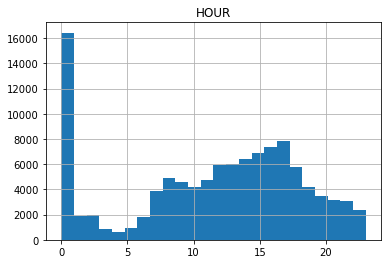

In [91]:
#Time Visualization Total Cases + Injuries per hour 
df_cd.hist(column='HOUR', bins=24)

array([[<AxesSubplot:title={'center':'HOUR'}>]], dtype=object)

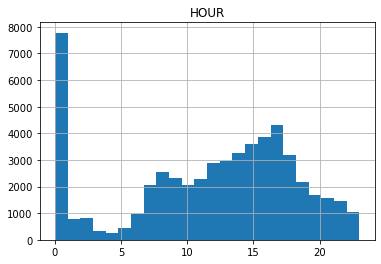

In [92]:
df_cd[df_cd['SEVERITYCODE']==2].hist(column='HOUR', bins=24)

In [93]:
df_cd['YEAR'].value_counts()

2005    8812
2006    8800
2007    8136
2008    7431
2004    7057
2015    6738
2016    6647
2017    6443
2014    6428
2009    6287
2012    6186
2018    6153
2010    6109
2011    5981
2013    5907
2019    5568
2020     739
Name: YEAR, dtype: int64

In [94]:
df_cd['MONTH'].value_counts()

10    10067
5      9541
7      9462
6      9457
8      9367
9      9177
11     9142
3      9061
1      9022
4      8999
12     8360
2      7767
Name: MONTH, dtype: int64

In [95]:
df_cd['DAY'].value_counts()

15    3819
12    3713
5     3696
2     3687
8     3657
10    3656
28    3651
9     3650
20    3649
7     3642
1     3621
6     3619
11    3613
23    3608
21    3605
14    3603
22    3597
18    3590
13    3576
19    3573
3     3558
16    3552
4     3549
27    3539
17    3515
26    3418
25    3412
24    3404
29    3299
30    3249
31    2102
Name: DAY, dtype: int64

In [96]:
df_cd.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  W - Clear  \
0             1 -122.290273  47.675783  2010      8    8    15          0   
1             1 -122.364526  47.524684  2011      2    7    16          0   
2             1 -122.334179  47.624418  2016     12   29    15          0   
3             1 -122.356651  47.703642  2013      4   26     0          1   
4             1 -122.290737  47.601644  2016      1    2    15          1   

   W - Clouds  W - Rain  W - Snow  W - Wind  R - Dry  R - Ice  R - Residues  \
0           1         0         0         0        1        0             0   
1           1         0         0         0        0        0             0   
2           0         1         0         0        0        0             0   
3           0         0         0         0        1        0             0   
4           0         0         0         0        1        0             0   

   R - Wet  L - Dark (Street Lights Off)  L - Dark (Street Lights On)  \
0        0                             0                            0   
1        1                             0                            0   
2        1                             0                            1   
3        0                             1                            0   
4        0                             0                            0   

   L - Dawn  L - Daylight  L - Dusk  
0         0             1         0  
1         0             1         0  
2         0             0         0  
3         0             0         0  
4         0             1         0

array([[<AxesSubplot:title={'center':'YEAR'}>]], dtype=object)

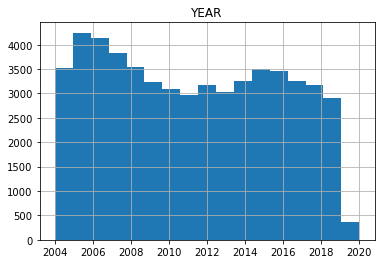

In [97]:
#bins=17 since there are 17 diferent years in the dataset although since 2020 hasnt finished that year is not properly represented
df_cd[df_cd['SEVERITYCODE']==2].hist(column='YEAR', bins=17)

array([[<AxesSubplot:title={'center':'MONTH'}>]], dtype=object)

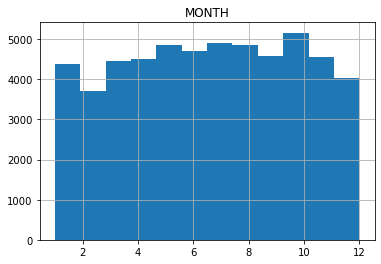

In [98]:
#bins = 12 since there are always 12 months in a year
df_cd[df_cd['SEVERITYCODE']==2].hist(column='MONTH', bins=12)

array([[<AxesSubplot:title={'center':'DAY'}>]], dtype=object)

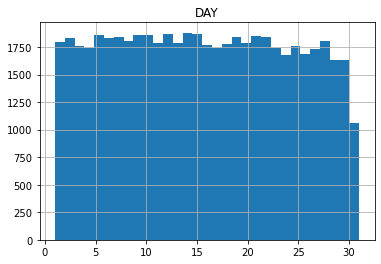

In [99]:
#bins equal to 31 since thats maximum number of days in a month - no surprise seeing the 31st with half the injuries since only about half the months have a day 31st
df_cd[df_cd['SEVERITYCODE']==2].hist(column='DAY', bins=31)

# Geographic Visualization

In [110]:
import folium

In [111]:
map_seattle = folium.Map(location=[47.6062100, -122.3320700], zoom_start=12)
map_seattle

In [112]:
df_geo = df_cd.loc[ : , 'SEVERITYCODE':'HOUR']

In [113]:
df_geo.drop(df_geo[df_geo['SEVERITYCODE'] == 1].index, inplace = True)

In [114]:
df_geo.shape

(54711, 7)

In [115]:
df_geo.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR
54711             2 -122.323148  47.703140  2013      3   27    14
54712             2 -122.306426  47.545739  2004      1   28     8
54713             2 -122.320780  47.614076  2020      4   15    17
54714             2 -122.384700  47.528475  2006      3   20    15
54715             2 -122.317414  47.664028  2013      3   31     2

In [116]:
df_geo.reset_index(drop=True, inplace=True)
df_geo.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR
0             2 -122.323148  47.703140  2013      3   27    14
1             2 -122.306426  47.545739  2004      1   28     8
2             2 -122.320780  47.614076  2020      4   15    17
3             2 -122.384700  47.528475  2006      3   20    15
4             2 -122.317414  47.664028  2013      3   31     2

In [117]:
limit = 1500

df_geo = df_geo.iloc[ 0:limit , : ]
df_geo.shape

(1500, 7)

In [118]:
acidentsloc = folium.map.FeatureGroup()

for lat, lng in zip(df_geo.Y, df_geo.X):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_seattle)

map_seattle

In [119]:
acidentsloc = folium.map.FeatureGroup()

for lat, lng, label in zip(df_geo.Y, df_geo.X, df_geo.HOUR):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='black' if label <= 5 else 'yellow',
        popup = str(label),
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_seattle)

map_seattle

# Preprocessing and Train Test Split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
df_cd.head()

SEVERITYCODE           X          Y  YEAR  MONTH  DAY  HOUR  W - Clear  \
0             1 -122.290273  47.675783  2010      8    8    15          0   
1             1 -122.364526  47.524684  2011      2    7    16          0   
2             1 -122.334179  47.624418  2016     12   29    15          0   
3             1 -122.356651  47.703642  2013      4   26     0          1   
4             1 -122.290737  47.601644  2016      1    2    15          1   

   W - Clouds  W - Rain  W - Snow  W - Wind  R - Dry  R - Ice  R - Residues  \
0           1         0         0         0        1        0             0   
1           1         0         0         0        0        0             0   
2           0         1         0         0        0        0             0   
3           0         0         0         0        1        0             0   
4           0         0         0         0        1        0             0   

   R - Wet  L - Dark (Street Lights Off)  L - Dark (Street Lights On)  \
0        0                             0                            0   
1        1                             0                            0   
2        1                             0                            1   
3        0                             1                            0   
4        0                             0                            0   

   L - Dawn  L - Daylight  L - Dusk  
0         0             1         0  
1         0             1         0  
2         0             0         0  
3         0             0         0  
4         0             1         0

In [122]:
df_cd['SEVERITYCODE'].value_counts()

2    54711
1    54711
Name: SEVERITYCODE, dtype: int64

In [123]:
df_cd.columns

Index(['SEVERITYCODE', 'X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'W - Clear',
       'W - Clouds', 'W - Rain', 'W - Snow', 'W - Wind', 'R - Dry', 'R - Ice',
       'R - Residues', 'R - Wet', 'L - Dark (Street Lights Off)',
       'L - Dark (Street Lights On)', 'L - Dawn', 'L - Daylight', 'L - Dusk'],
      dtype='object')

In [124]:
#Year makes no sense to train an alert system as there is never the same year conditions dont repeat
X = df_cd[['MONTH', 'DAY', 'HOUR', 'W - Clear', 'W - Clouds',
       'W - Rain', 'W - Snow', 'W - Wind', 'R - Dry', 'R - Ice',
       'R - Residues', 'R - Wet', 'L - Dark (Street Lights Off)',
       'L - Dark (Street Lights On)', 'L - Dawn', 'L - Daylight', 'L - Dusk']]
X[0:5]

MONTH  DAY  HOUR  W - Clear  W - Clouds  W - Rain  W - Snow  W - Wind  \
0      8    8    15          0           1         0         0         0   
1      2    7    16          0           1         0         0         0   
2     12   29    15          0           0         1         0         0   
3      4   26     0          1           0         0         0         0   
4      1    2    15          1           0         0         0         0   

   R - Dry  R - Ice  R - Residues  R - Wet  L - Dark (Street Lights Off)  \
0        1        0             0        0                             0   
1        0        0             0        1                             0   
2        0        0             0        1                             0   
3        1        0             0        0                             1   
4        1        0             0        0                             0   

   L - Dark (Street Lights On)  L - Dawn  L - Daylight  L - Dusk  
0                            0         0             1         0  
1                            0         0             1         0  
2                            1         0             0         0  
3                            0         0             0         0  
4                            0         0             1         0

In [125]:
X.columns

Index(['MONTH', 'DAY', 'HOUR', 'W - Clear', 'W - Clouds', 'W - Rain',
       'W - Snow', 'W - Wind', 'R - Dry', 'R - Ice', 'R - Residues', 'R - Wet',
       'L - Dark (Street Lights Off)', 'L - Dark (Street Lights On)',
       'L - Dawn', 'L - Daylight', 'L - Dusk'],
      dtype='object')

In [126]:
y = df_cd['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [127]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.42468063, -0.86879458,  0.50245665, -1.33725386,  2.28527073,
        -0.4893751 , -0.06609945, -0.0193607 ,  0.63005691, -0.10260636,
        -0.0261895 , -0.61288931, -0.11685342, -0.60771332, -0.11994869,
         0.70369262, -0.18710221],
       [-1.34133272, -0.98261763,  0.64861386, -1.33725386,  2.28527073,
        -0.4893751 , -0.06609945, -0.0193607 , -1.58715822, -0.10260636,
        -0.0261895 ,  1.631616  , -0.11685342, -0.60771332, -0.11994869,
         0.70369262, -0.18710221],
       [ 1.60202286,  1.52148951,  0.50245665, -1.33725386, -0.43758492,
         2.0434223 , -0.06609945, -0.0193607 , -1.58715822, -0.10260636,
        -0.0261895 ,  1.631616  , -0.11685342,  1.64551272, -0.11994869,
        -1.42107501, -0.18710221],
       [-0.7526616 ,  1.18002035, -1.68990151,  0.74780117, -0.43758492,
        -0.4893751 , -0.06609945, -0.0193607 ,  0.63005691, -0.10260636,
        -0.0261895 , -0.61288931,  8.55772957, -0.60771332, -0.11994869,
        -1.42107501

In [128]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87537, 17) (87537,)
Test set: (21885, 17) (21885,)


# Model : KNN (K-Nearest Neighbours)

In [137]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
K = 9
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)

In [132]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 2])

In [133]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6243302831945349
Test set Accuracy:  0.5094813799405986


In [134]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5045008 , 0.50399817, 0.50573452, 0.50486635, 0.50870459,
       0.50605438, 0.50578021, 0.50742518, 0.50948138])

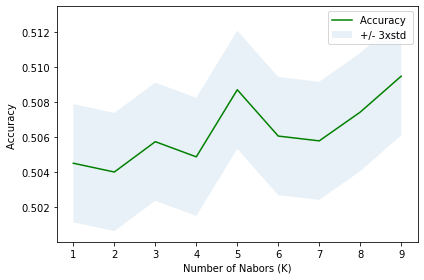

In [135]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [138]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.51      0.50      0.51     10895
           2       0.51      0.51      0.51     10990

   micro avg       0.51      0.51      0.51     21885
   macro avg       0.51      0.51      0.51     21885
weighted avg       0.51      0.51      0.51     21885



# Model : Decision Trees

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
AccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
AccidentTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
AccidentTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
predTree = AccidentTree.predict(X_test)

In [143]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 2 2]
[2 1 2 1 2]


In [144]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5166095499200366


In [145]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           1       0.51      0.57      0.54     10895
           2       0.52      0.46      0.49     10990

   micro avg       0.52      0.52      0.52     21885
   macro avg       0.52      0.52      0.52     21885
weighted avg       0.52      0.52      0.52     21885



# Model : Logistic Regression

In [146]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
import itertools

In [147]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 2, 1])

In [149]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.55909363, 0.44090637],
       [0.51674011, 0.48325989],
       [0.50179574, 0.49820426],
       ...,
       [0.60182906, 0.39817094],
       [0.47035353, 0.52964647],
       [0.5267289 , 0.4732711 ]])

In [150]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5165181631254284

In [151]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.52      0.43      0.47     10895
           2       0.52      0.60      0.56     10990

   micro avg       0.52      0.52      0.52     21885
   macro avg       0.52      0.52      0.51     21885
weighted avg       0.52      0.52      0.51     21885



In [152]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6916292504173374

# Model : SVM (Support Vector Machines)

In [156]:
import pylab as pl
import scipy.optimize as opt

In [154]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 2, 2, 2])

In [157]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.52      0.35      0.42     10895
           2       0.52      0.68      0.59     10990

   micro avg       0.52      0.52      0.52     21885
   macro avg       0.52      0.52      0.50     21885
weighted avg       0.52      0.52      0.50     21885



In [158]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5046614705013496

In [159]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5179346584418552

# Frequency Analysis

In [236]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [237]:
Incidence = (58188/(136485+58188))

In [238]:
Incidence

0.29890123437764865

In [239]:
df_2019 = df_c[df_c['YEAR'] == 2019]

In [240]:
df_2019.shape

(8246, 21)

In [241]:
Accperday = (8246/365)

In [242]:
Accperday

22.59178082191781

In [243]:
Injperday = Accperday*Incidence

In [244]:
Injperday

6.752711174460523

array([[<AxesSubplot:title={'center':'HOUR'}>]], dtype=object)

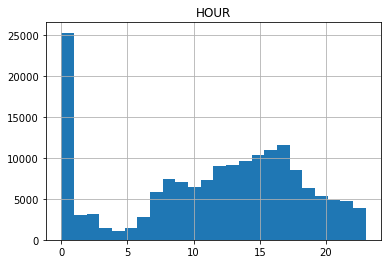

In [245]:
df_c.hist(column='HOUR', bins=24)

In [246]:
df_2019 = df_c[df_c['YEAR'] == 2019]

In [247]:
df_2019_H = df_2019['HOUR'].value_counts().to_frame()

In [248]:
df_2019_H

HOUR
17   627
14   592
16   543
15   535
12   528
13   509
8    494
18   466
11   465
9    451
10   416
7    401
19   349
20   296
21   272
22   251
23   187
6    168
0    159
2    135
1    129
5    105
3     95
4     73

In [249]:
df_2019_H.sort_index(inplace=True)

In [232]:
df_2019_H

HOUR
0    159
1    129
2    135
3     95
4     73
5    105
6    168
7    401
8    494
9    451
10   416
11   465
12   528
13   509
14   592
15   535
16   543
17   627
18   466
19   349
20   296
21   272
22   251
23   187

In [250]:
df_2019_H.columns = ['TOTALINJURIESPERHOURPERDAY'] # Still not per day or injuries

In [251]:
df_2019_H = df_2019_H['TOTALINJURIESPERHOURPERDAY']/365 # Now per day

In [252]:
df_2019_H

0     0.435616
1     0.353425
2     0.369863
3     0.260274
4     0.200000
5     0.287671
6     0.460274
7     1.098630
8     1.353425
9     1.235616
10    1.139726
11    1.273973
12    1.446575
13    1.394521
14    1.621918
15    1.465753
16    1.487671
17    1.717808
18    1.276712
19    0.956164
20    0.810959
21    0.745205
22    0.687671
23    0.512329
Name: TOTALINJURIESPERHOURPERDAY, dtype: float64

In [253]:
df_2019_H = df_2019_H*0.29890123437764865

In [255]:
df_2019_H.to_frame()

TOTALINJURIESPERHOURPERDAY
0                     0.130206
1                     0.105639
2                     0.110553
3                     0.077796
4                     0.059780
5                     0.085985
6                     0.137576
7                     0.328382
8                     0.404540
9                     0.369327
10                    0.340666
11                    0.380792
12                    0.432383
13                    0.416824
14                    0.484793
15                    0.438116
16                    0.444667
17                    0.513455
18                    0.381611
19                    0.285799
20                    0.242397
21                    0.222743
22                    0.205546
23                    0.153136